# Загрузка данных

In [ ]:
!pip install catboost
!pip install optuna
!pip install optuna.integration
!pip install featuretools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from optuna.integration import OptunaSearchCV
import optuna
from optuna import distributions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import featuretools as ft

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Dok24/diabetes_ds.xlsx'

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,Лейкоциты,Лимфоциты%,"ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)",Тромбоциты,СОЭ,Холестерин,ЛПНП,ЛПВП,Индекс атерогенности 2 (формула excel),Глюкоза,Гликированный гемоглобин,СРБ,Ферритин,Прокальцитонин,Альбумин,Лактат,ЛДГ,АЛТ,АСТ,Общий билирубин,Натрийуретический пептид,Мочевина,"Креатинин, мкмоль/л",СКФ CKD-EPI (расчет по общей формуле),Натрий,Калий,АЧТВ,МНО,Фибриноген,D-димер,Фавипиравир,Молнупиравир,Гидрохлортиазид,Фуросемид,Торасемид,Спиронолактон,Валсартан,Телмисартан,Лозартан,Кандесартан,Изосорбида динитрат,Периндоприл,Рамиприл,Эналаприл,Лизиноприл,Бисопролол,Карведилол,Атенолол,Верапамил,Дилтиазем,Леркамен,Амлодипин,Дигоксин,Ивабрадин,Гиполипидемические препараты (статины),"Антикоагулянты, препарат","Антикоагулянты, препарат 2","Антиагреганты, препарат 1","Антиагреганты, препарат 2",Триметазидин,Метформин,Дапаглифлозин,СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ,ОЖИРЕНИЕ (ЕСТЬ\НЕТ),BPB голеней,BPB голеней (ЕСТЬ/НЕТ),Тромбоэмболический синдром,ВПС,НЕАЖБП,Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ,Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий),Блокада НП Гисса,Блокада НП Гисса (комментарий),Удлинение интервала QT,AV- блокада,ХБП (исходн),ХБП (расчет по СКФ),ХБП (ЕСТЬ\НЕТ),Мерцательная аритмия,Мерцательная аритмия (ЕСТЬ\НЕТ),Аблация,АКШ,БА,БА (ЕСТЬ/НЕТ),ХОБЛ,ХОБЛ (ЕСТЬ\НЕТ),ИБС. Стенокардия,ИБС. Стенокардия (ЕСТЬ\НЕТ),ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет (ЕСТЬ\НЕТ)
0,390.0,1.0,68.0,2.0,158.0,86.0,34.449607,5.33,163.0,0.0,9.61,31.9,3.06559,201.0,8.0,4.14,2.25,0.97,3.268041,5.77,6.5,0.19,NaN,NaN,NaN,NaN,NaN,24.0,21.0,NaN,197.7,NaN,79.80,65.460393,NaN,5.76,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,1.0,0.0,NaN,0,NaN,0.0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0,0,1.0
1,337.0,1.0,54.0,1.0,180.0,119.0,36.728395,5.01,130.0,0.0,10.48,19.0,1.99120,288.0,5.0,3.43,1.31,1.19,1.882353,5.91,6.1,NaN,NaN,NaN,46.0,NaN,NaN,12.0,14.0,NaN,2358.0,10.10,107.28,67.223532,140.4,4.38,38.2,2.34,3.71,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,1.0,NaN,0.0,1.0,1.0,2.0,1.0,1,1.0,1.0,0.0,0.0,1.0,умеренная гипертрофия,1,полная блокада,0.0,0,с3б,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,35,1.0
2,160.0,1.0,68.0,1.0,174.0,110.0,36.332409,NaN,161.0,0.0,5.40,25.6,1.38240,114.0,10.0,4.23,2.69,0.94,3.500000,6.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.5,20.7,18.1,NaN,NaN,106.20,61.677030,140.6,4.30,33.7,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,NaN,1.0,NaN,0.0,0.0,0.0,2.0,1.0,1,1.0,0.0,0.0,0.0,1.0,NaN,1-2,NaN,0.0,1,с3,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,35,1.0
3,166.0,1.0,67.0,1.0,189.0,110.0,30.794211,4.47,134.0,0.0,8.50,13.3,1.13050,175.0,5.0,NaN,NaN,NaN,NaN,4.98,NaN,20.35,NaN,NaN,43.6,NaN,327.0,17.9,23.8,23.3,454.6,10.78,91.20,74.666361,140.6,4.00,26.3,1.09,3.68,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,1.0,NaN,0.0,1.0,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,0.0,1,0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,0,1.0
4,439.0,1.0,60.0,1.0,178.0,115.0,36.295922,5.44,166.0,0.0,9.06,28.3,2.56398,226.0,5.0,3.25,1.45,1.30,1.500000,9.48,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.7,3.20,81.70,89.585462,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,0.0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2

In [ ]:
df.tail()

,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,Лейкоциты,Лимфоциты%,"ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)",Тромбоциты,СОЭ,Холестерин,ЛПНП,ЛПВП,Индекс атерогенности 2 (формула excel),Глюкоза,Гликированный гемоглобин,СРБ,Ферритин,Прокальцитонин,Альбумин,Лактат,ЛДГ,АЛТ,АСТ,Общий билирубин,Натрийуретический пептид,Мочевина,"Креатинин, мкмоль/л",СКФ CKD-EPI (расчет по общей формуле),Натрий,Калий,АЧТВ,МНО,Фибриноген,D-димер,Фавипиравир,Молнупиравир,Гидрохлортиазид,Фуросемид,Торасемид,Спиронолактон,Валсартан,Телмисартан,Лозартан,Кандесартан,Изосорбида динитрат,Периндоприл,Рамиприл,Эналаприл,Лизиноприл,Бисопролол,Карведилол,Атенолол,Верапамил,Дилтиазем,Леркамен,Амлодипин,Дигоксин,Ивабрадин,Гиполипидемические препараты (статины),"Антикоагулянты, препарат","Антикоагулянты, препарат 2","Антиагреганты, препарат 1","Антиагреганты, препарат 2",Триметазидин,Метформин,Дапаглифлозин,СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ,ОЖИРЕНИЕ (ЕСТЬ\НЕТ),BPB голеней,BPB голеней (ЕСТЬ/НЕТ),Тромбоэмболический синдром,ВПС,НЕАЖБП,Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ,Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий),Блокада НП Гисса,Блокада НП Гисса (комментарий),Удлинение интервала QT,AV- блокада,ХБП (исходн),ХБП (расчет по СКФ),ХБП (ЕСТЬ\НЕТ),Мерцательная аритмия,Мерцательная аритмия (ЕСТЬ\НЕТ),Аблация,АКШ,БА,БА (ЕСТЬ/НЕТ),ХОБЛ,ХОБЛ (ЕСТЬ\НЕТ),ИБС. Стенокардия,ИБС. Стенокардия (ЕСТЬ\НЕТ),ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет (ЕСТЬ\НЕТ)
479,155.0,2.0,47.0,2.0,168.0,58.0,20.549887,4.32,131.0,0.0,6.62,11.5,0.76130,208.0,NaN,7.03,2.99,3.67,0.915531,5.45,NaN,NaN,NaN,NaN,45.7,NaN,NaN,33.1,42.4,NaN,NaN,6.26,72.00,85.911421,140.7,5.27,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,2,NaN,0.0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0,0.0
480,302.0,2.0,69.0,1.0,170.0,61.0,21.107266,4.40,140.0,0.0,6.90,1.4,0.09660,273.0,3.0,5.93,3.37,1.49,2.979866,5.00,5.9,NaN,NaN,NaN,NaN,NaN,NaN,23.8,24.8,14.0,596.5,4.80,93.00,71.905375,NaN,NaN,NaN,2.73,3.16,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,NaN,0,NaN,0.0,0,0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,38,0.0
481,345.0,2.0,62.0,1.0,175.0,75.0,24.489796,4.59,147.0,0.0,9.47,17.6,1.66672,263.0,NaN,3.41,2.51,0.78,3.371795,6.17,NaN,NaN,NaN,NaN,39.0,NaN,NaN,52.0,38.0,13.4,9151.0,5.93,90.06,78.520559,138.9,3.90,31.3,1.32,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,2.0,NaN,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,0.0,0,0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,35,0.0
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN,91.0,28.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403.0,NaN,142.0,NaN,NaN,NaN,22.0,NaN,56.0,NaN,144.0,NaN,357.0,NaN,445.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Columns: 108 entries, Номер to Сахарный диабет (ЕСТЬ\НЕТ)
dtypes: float64(101), object(7)
memory usage: 408.5+ KB


# Предобработка данных

In [ ]:
# Две последние строки Nan - удаляем их
last_rows = [482, 483]
df.drop(last_rows, inplace=True)

In [ ]:
# Смотрим пропуски в таргете, если есть - удаляем
df['Сахарный диабет (ЕСТЬ\НЕТ)'].isna().sum()

4

In [ ]:
# Удаляем Nan в таргете
df.dropna(subset=['Сахарный диабет (ЕСТЬ\НЕТ)'], inplace=True)
df['Сахарный диабет (ЕСТЬ\НЕТ)'].isna().sum()

0

In [ ]:
def rename_columns_auto(df):
    """
    Переименовывает столбцы DataFrame, заменяя пробелы, точки, запятые и скобки на нижние подчеркивания
    и переводя все символы в нижний регистр.

    Аргументы:
    df (DataFrame): DataFrame, который требуется переименовать.

    Возвращает:
    DataFrame: DataFrame с переименованными столбцами.
    """
    return df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('.', '').replace(',', '').replace('(', '').replace(')', ''))

df = rename_columns_auto(df)

In [ ]:
# Смотрим количество пропущенных значений в процентах по всем фичам
missing_percentage = df.isna().mean() * 100
print(round(missing_percentage, 2).sort_values(ascending=False))

прокальцитонин                                                         99.58
лактат                                                                 97.91
антикоагулянты_препарат_2                                              97.49
антиагреганты_препарат_2                                               96.44
гипертрофия_миокарда_левого_желудочка_по_экг_или_эхо-кг_комментарий    94.56
ферритин                                                               93.72
блокада_нп_гисса_комментарий                                           91.42
лдг                                                                    91.42
d-димер                                                                87.24
фибриноген                                                             78.45
срб                                                                    73.85
ачтв                                                                   69.46
альбумин                                                               69.04

На основе анализа мед источников, вот насколько каждый из признаков(с более 50% пропусков) важен для определения диабета:
- прокальцитонин - Не важен. Используется для диагностики бактериальных инфекций и сепсиса.
- лактат - Не важен. Повышенный уровень лактата может указывать на различные - патологические состояния, но не является специфичным для диабета.
- антикоагулянты_препарат_2 - Не важен. Относится к лекарственным препаратам.
антиагреганты_препарат_2 - Не важен. Относится к лекарственным препаратам.
- гипертрофия_миокарда_левого_желудочка_по_экг_или_эхо-кг_комментарий - Не важен. Связан с сердечно-сосудистыми заболеваниями.
- ферритин - Не важен. Маркер воспаления и нарушений обмена железа, но не диабета.
- блокада_нп_гисса_комментарий - Не важен. Относится к нарушениям проводимости сердца.
- лдг - Не важен. Фермент, повышенный при различных патологиях, но неспецифичен для диабета.
- d-димер - Не важен. Маркер тромбообразования и воспаления.
- фибриноген - Не важен. Фактор свертывания крови.
- срб - Не важен. Общий маркер воспаления, но не специфичен для диабета.
- ачтв - Не важен. Показатель свертываемости крови.
- альбумин - Не важен. Белок крови, низкие уровни могут быть при различных патологиях.
- мно - Не важен. Показатель свертываемости крови.
- антиагреганты_препарат_1 - Не важен. Относится к лекарственным препаратам.
- натрий - Не важен. Электролит, нарушения которого могут быть при различных состояниях.

Ни один из перечисленных признаков не является важным или специфичным для определения диабета по данным источникам. Для диагностики диабета наиболее важны уровни глюкозы и гликированного гемоглобина в крови, которые не представлены в этом списке.





Удалим все что имеет больше 50% пропусков

In [ ]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
features_to_drop = missing_percentages[missing_percentages > 50].index
df = df.drop(columns=features_to_drop)

Глюкоза - самый важный признак для диабета, сложно представить что не данных, думаю можно удалить 5% данных.

In [ ]:
# Удаляем Nan в глюкозе
df.dropna(subset=['глюкоза'], inplace=True)
df['глюкоза'].isna().sum()

0

Посмотрим на категориальные признаки и приведем их в нужный вид для заполнения пропусков

In [ ]:
categorical_df = df.select_dtypes(exclude=[np.number])
categorical_df.head()

,bpb_голеней,блокада_нп_гисса,av-_блокада,хбп_исходн,хсн_по_фракции_выброса_%
0,0,0,0,0,0
1,1,1,0,с3б,35
2,1,1-2,1,с3,35
3,0,1,1,0,0
4,0,0,0,0,0


In [ ]:
df['bpb_голеней'].fillna(0, inplace=True)
df['bpb_голеней'] = df['bpb_голеней'].replace({'2-3': 2})

In [ ]:
df['блокада_нп_гисса'].fillna(0, inplace=True)
df['блокада_нп_гисса'] = df['блокада_нп_гисса'].replace({'1-2': 1})

In [ ]:
df['av-_блокада'].fillna(0, inplace=True)
df['av-_блокада'] = df['av-_блокада'].replace({'полная': 4,
                                               '1-2': 1,
                                               '2-3': 2,})

ХБП классифицируется по цифре + буквы(разные стадии или что то вроде того). Заменим все на цифры для обобщенности.

In [ ]:
df['хбп_исходн'].replace({
    'с1 а3': '1',
    '2а': '2',
    'с2-с3': '2',
    '2са1': '2',
    'с3а-с3б': '3',
    'с3б': '3',
    'с3': '3',
    'сс2': '3',
    'с3а-с3б': '2',
    'с3а': '3',
    'с4': '4',
    'с1': '1',
    'с2': '2'
}, inplace=True)

In [ ]:
df['хбп_исходн'].unique()

array([0, '3', '2', '4', '1'], dtype=object)

In [ ]:
df['хсн_по_фракции_выброса_%'].unique()

array([0, 35, 40, 42, 34, 31, 33, 23, 29, 41, 38, '24-25', 30, 27, 32, 36,
       50, 45, '25.9', 28, 39, 58, 26, 37, 51, '22-25', 59, 46, 25, 48,
       '32-36', 43, 49, 20, '20-25', '39-40', '15-20', 18, 24, '34-35',
       '30-31', '28-30', 47, 22, 61, 21, 66, '42-43', '36-38', '30-32',
       'с2', '28.9', '43.4', '32-33', '30-35', 44, '34-36', '40-41', 17,
       '33-48', '33-35', '46-48', '38-40', '35-37', '21-25', '24-26',
       '33-52', '37-47', '23-25', '55-56', '20-32', '18-20', 57],
      dtype=object)

In [ ]:
def to_number(value):
    if isinstance(value, str):
        if '-' in value:
            value = value.split('-')[0]  # Берем только первое число из диапазона
        value = value.replace('с', '')  # Убираем 'с' из строки
        try:
            return float(value)  # Преобразуем строку в число
        except ValueError:
            return None  # Если не удалось преобразовать, возвращаем None
    else:
        return value  # Возвращаем значение без изменений, если это не строка

df['хсн_по_фракции_выброса_%'] = df['хсн_по_фракции_выброса_%'].apply(to_number)

Метформин - данные из будущего, лекарство которое принимают во время болезни. Во время обучения с этим признаком он имеет львиную значимость. + удалим id столбец + гликированный_гемоглобин(хз, в обещем чате написали удалить)

In [ ]:
df.drop('метформин', axis=1, inplace=True)
df.drop('номер', axis=1, inplace=True)
df.drop('гликированный_гемоглобин', axis=1, inplace=True)

Переводим данные в числовой формат

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

Заполняем пропуски с помощью Iterative Imputer

In [ ]:
random_state=654321
imputer = IterativeImputer(max_iter=10, random_state=random_state)
imputed_data = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Удаляем выбросы с помощью LOF (isolated forest и iqr удаляли слишком много данных и качество метрики падало)

In [ ]:
num_rows_before = imputed_df.shape[0]

lof_model = LocalOutlierFactor()
lof_model.fit(imputed_df.drop(columns=['сахарный_диабет_есть\нет']))
outliers = lof_model.fit_predict(imputed_df.drop(columns=['сахарный_диабет_есть\нет']))
imputed_df = imputed_df[outliers != -1]

num_rows_after = imputed_df.shape[0]

print("Количество строк до удаления выбросов:", num_rows_before)
print("Количество строк после удаления выбросов:", num_rows_after)

Количество строк до удаления выбросов: 451
Количество строк после удаления выбросов: 437


Смотрим на распределение. Большинство распределний логнормальные и скошенные, с чем в принципе бустинг справится. Логорифмирование метрику не улучшило

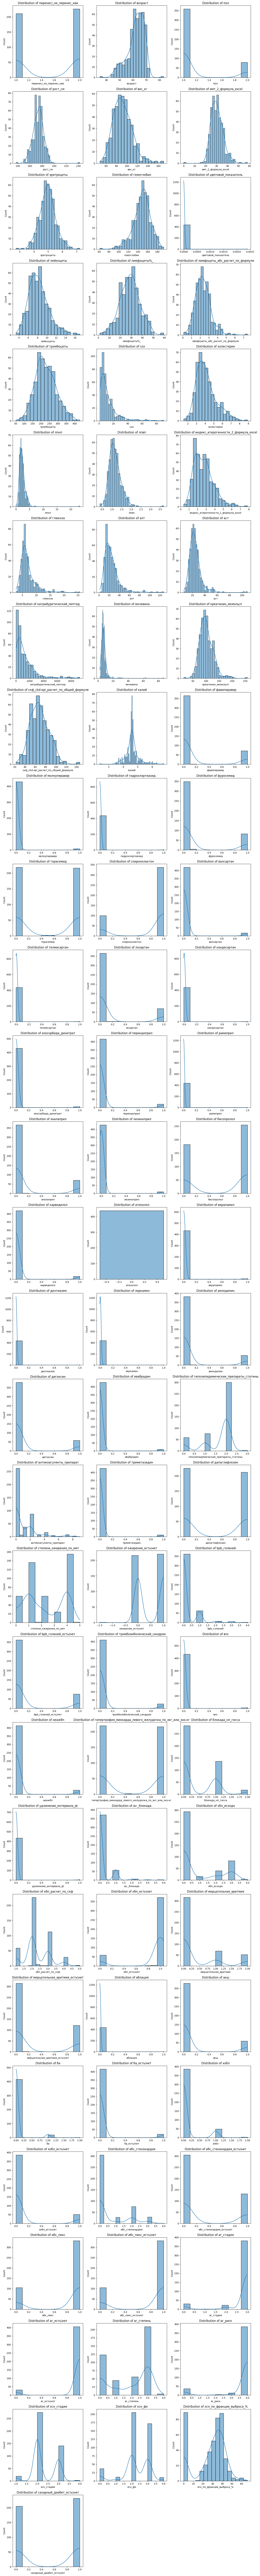

In [ ]:
def draw_histplot_all(df):
    """
    Рисует гистограммы распределения значений для всех числовых столбцов DataFrame.
    Функция вычисляем количество столбцов и строк для размещения графиков и округляет количество строк вверх.
    Создает фигуру для графиков с соответствующим размером, перебираем все столбцы DataFrame и строим для каждого гистограмму.

    Аргументы:
    df (DataFrame): DataFrame, для которого требуется построить гистограммы.

    Возвращает:
    Гистограммы распределения признаков
    """
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 3)

    plt.figure(figsize=(15, 5*num_rows))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

draw_histplot_all(imputed_df)

Генерим новые фичи с помощью featuretools на 15 топ признаках по feature importance c прошлой модели

In [ ]:
columns_to_keep = ['креатинин_мкмоль/л', 'тромбоциты', 'лейкоциты', 'эритроциты', 'алт', 'глюкоза', 'гемоглобин',
                   'лпвп', 'лпнп', 'холестерин', 'мочевина', 'калий', 'вес_кг', 'степени_ожирения_по_имт', 'натрийуретический_пептид',
                   'имт_2_формула_excel', 'рост_см']

num_col_before = imputed_df.shape[1]

es = ft.EntitySet(id="data")

filtered_df_selected_columns = imputed_df[columns_to_keep]

es = es.add_dataframe(
    dataframe_name="data",
    dataframe=filtered_df_selected_columns,
    index="index"
)

max_depth = 3

feature_matrix, _ = ft.dfs(
    entityset=es,
    target_dataframe_name="data",
    agg_primitives=["mean", "max", "min", "std", "variance", "skew"],
    trans_primitives=["multiply_numeric", "divide_numeric", "percentile"],
    verbose=True,
    max_depth=max_depth
)

# feature_matrix = pd.read_csv('/content/drive/My Drive/feature_matrix.csv')

feature_matrix = feature_matrix.drop(columns=imputed_df.columns, errors='ignore')
imputed_df = imputed_df.drop(columns=feature_matrix.columns, errors='ignore')
imputed_df = imputed_df.join(feature_matrix)

num_col_after = imputed_df.shape[1]

feature_matrix.to_csv('/content/drive/My Drive/feature_matrix.csv', index=False)

print("Количество признаков до:", num_col_before)
print("Количество признаков после:", num_col_after)

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1914: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['max', 'mean', 'min', 'skew', 'std', 'variance']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 442 features
Elapsed: 00:00 | Progress: 100%|██████████
Количество признаков до: 288
Количество признаков после: 506


In [ ]:
imputed_df.head()

,перенес/_не_перенес_кви,возраст,пол,рост_см,вес_кг,имт_2_формула_excel,эритроциты,гемоглобин,цветовой_показатель,лейкоциты,лимфоциты%_,лимфоциты_абс_расчет_по_формуле,тромбоциты,соэ,холестерин,лпнп,лпвп,индекс_атерогенности_2_формула_excel,глюкоза,алт,аст,натрийуретический_пептид,мочевина,креатинин_мкмоль/л,скф_ckd-epi_расчет_по_общей_формуле,калий,фавипиравир,молнупиравир,гидрохлортиазид,фуросемид,торасемид,спиронолактон,валсартан,телмисартан,лозартан,кандесартан,изосорбида_динитрат,периндоприл,рамиприл,эналаприл,лизиноприл,бисопролол,карведилол,атенолол,верапамил,дилтиазем,леркамен,амлодипин,дигоксин,ивабрадин,гиполипидемические_препараты_статины,антикоагулянты_препарат,триметазидин,дапаглифлозин,степени_ожирения_по_имт,ожирение_есть\нет,bpb_голеней,bpb_голеней_есть/нет,тромбоэмболический_синдром,впс,неажбп,гипертрофия_миокарда_левого_желудочка_по_экг_или_эхо-кг,блокада_нп_гисса,удлинение_интервала_qt,av-_блокада,хбп_исходн,хбп_расчет_по_скф,хбп_есть\нет,мерцательная_аритмия,аблация,акш,ба,хобл,ибс_стенокардия,ибс_пикс,аг_стадия,аг_степень,хсн_стадии,хсн_фк,хсн_по_фракции_выброса_%,сахарный_диабет_есть\нет,алт / вес_кг,алт / глюкоза,алт / креатинин_мкмоль/л,алт / лейкоциты,алт / лпвп,алт / лпнп,алт / мочевина,алт / натрийуретический_пептид,алт / степени_ожирения_по_имт,алт / тромбоциты,вес_кг / алт,вес_кг / гемоглобин,вес_кг / глюкоза,вес_кг / имт_2_формула_excel,вес_кг / калий,вес_кг / креатинин_мкмоль/л,вес_кг / лейкоциты,вес_кг / лпвп,вес_кг / лпнп,вес_кг / мочевина,вес_кг / рост_см,вес_кг / степени_ожирения_по_имт,вес_кг / тромбоциты,вес_кг / холестерин,вес_кг / эритроциты,гемоглобин / глюкоза,гемоглобин / имт_2_формула_excel,гемоглобин / калий,гемоглобин / креатинин_мкмоль/л,гемоглобин / лейкоциты,гемоглобин / лпвп,гемоглобин / мочевина,гемоглобин / рост_см,гемоглобин / тромбоциты,гемоглобин / холестерин,гемоглобин / эритроциты,глюкоза / алт,глюкоза / вес_кг,глюкоза / гемоглобин,глюкоза / калий,глюкоза / креатинин_мкмоль/л,глюкоза / лейкоциты,глюкоза / лпвп,глюкоза / лпнп,глюкоза / мочевина,глюкоза / степени_ожирения_по_имт,глюкоза / тромбоциты,глюкоза / холестерин,имт_2_формула_excel / калий,имт_2_формула_excel / рост_см,имт_2_формула_excel / эритроциты,калий / глюкоза,калий / лейкоциты,калий / лпвп,калий / мочевина,калий / рост_см,калий / тромбоциты,калий / холестерин,калий / эритроциты,креатинин_мкмоль/л / алт,креатинин_мкмоль/л / вес_кг,креатинин_мкмоль/л / гемоглобин,креатинин_мкмоль/л / глюкоза,креатинин_мкмоль/л / калий,креатинин_мкмоль/л / лейкоциты,креатинин_мкмоль/л / лпвп,креатинин_мкмоль/л / лпнп,креатинин_мкмоль/л / мочевина,креатинин_мкмоль/л / рост_см,креатинин_мкмоль/л / тромбоциты,креатинин_мкмоль/л / холестерин,лейкоциты / алт,лейкоциты / вес_кг,лейкоциты / глюкоза,лейкоциты / креатинин_мкмоль/л,лейкоциты / лпвп,лейкоциты / лпнп,лейкоциты / мочевина,лейкоциты / тромбоциты,лейкоциты / холестерин,лпвп / алт,лпвп / вес_кг,лпвп / гемоглобин,лпвп / глюкоза,лпвп / калий,лпвп / креатинин_мкмоль/л,лпвп / лейкоциты,лпвп / лпнп,лпвп / мочевина,лпвп / тромбоциты,лпвп / холестерин,лпнп / алт,лпнп / вес_кг,лпнп / глюкоза,лпнп / креатинин_мкмоль/л,лпнп / лейкоциты,лпнп / мочевина,лпнп / степени_ожирения_по_имт,лпнп / тромбоциты,мочевина / алт,мочевина / вес_кг,мочевина / лпнп,мочевина / степени_ожирения_по_имт,мочевина / тромбоциты,натрийуретический_пептид / алт,натрийуретический_пептид / вес_кг,натрийуретический_пептид / креатинин_мкмоль/л,натрийуретический_пептид / лпнп,натрийуретический_пептид / степени_ожирения_по_имт,натрийуретический_пептид / тромбоциты,рост_см / эритроциты,степени_ожирения_по_имт / алт,степени_ожирения_по_имт / глюкоза,степени_ожирения_по_имт / креатинин_мкмоль/л,степени_ожирения_по_имт / лейкоциты,степени_ожирения_по_имт / лпвп,степени_ожирения_по_имт / лпнп,степени_ожирения_по_имт / мочевина,степени_ожирения_по_имт / тромбоциты,тромбоциты / алт,тромбоциты / вес_кг,тромбоциты / гемоглобин,тромбоциты / глюкоза,тромбоциты / калий,тромбоциты / креатинин_мкмоль/л,тромбоциты / лейкоциты,тромбоци

Удаляем признаки с корреляцией >90%

In [ ]:
num_features_before = len(imputed_df.columns)

correlation_matrix = imputed_df.corr()

highly_correlated_features = (correlation_matrix.abs() > 0.9)
dropped_columns = set()

for i in range(len(highly_correlated_features.columns)):
    for j in range(i+1, len(highly_correlated_features.columns)):
        if highly_correlated_features.iloc[i, j]:
            colname_j = highly_correlated_features.columns[j]
            if colname_j not in dropped_columns:
                del imputed_df[colname_j]
                dropped_columns.add(colname_j)

num_features_after = len(imputed_df.columns)

print("Количество признаков до удаления:", num_features_before)
print("Количество признаков после удаления:", num_features_after)

Количество признаков до удаления: 506
Количество признаков после удаления: 288


In [ ]:
# Делаем таргет int
imputed_df['сахарный_диабет_есть\нет'] = imputed_df['сахарный_диабет_есть\нет'].astype(int)

# Обучение модели

In [ ]:
features = imputed_df.drop(['сахарный_диабет_есть\нет'], axis=1)
target = imputed_df['сахарный_диабет_есть\нет']

random_state = 654321
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.3,
                                                                            random_state=random_state)

# Метод рекурсивного исключения признаков (RFE)
#num_features_to_select = int(0.1 * features_train.shape[1])
#rfe_selector = RFE(CatBoostClassifier(random_state=random_state), n_features_to_select=num_features_to_select, step=1)
#rfe_selector = rfe_selector.fit(features_train, target_train)
#selected_features_rfe = features_train.columns[rfe_selector.support_]

# Отбор признаков на основе модели (Model-based Feature Selection)
model_selector = SelectFromModel(CatBoostClassifier(random_state=random_state))
model_selector.fit(features_train, target_train)
feature_importances = model_selector.estimator_.feature_importances_
threshold = np.percentile(feature_importances, 100 - 25)
model_selector.threshold = threshold
selected_features_model = features_train.columns[model_selector.get_support()]

# Метод выбора признаков на основе важности (Feature Importance-based Selection)
rf_model = CatBoostClassifier(random_state=random_state)
rf_model.fit(features_train, target_train)
importance = permutation_importance(rf_model, features_train, target_train)
selected_features_importance = features_train.columns[np.argsort(importance.importances_mean)[::-1][:int(0.25 * len(features_train.columns))]]

#selected_features_union = set(selected_features_rfe) | set(selected_features_model) | set(selected_features_importance)


from collections import OrderedDict
class OrderedSet(OrderedDict):
    def __init__(self, *args, **kwargs):
        super().__init__(**kwargs)

    def add(self, value):
        self[value] = None

    def update(self, values):
        for value in values:
            self.add(value)

#selected_features_union = OrderedSet(selected_features_rfe)
#selected_features_union.update(selected_features_model)
#selected_features_union.update(selected_features_importance)

selected_features_union = OrderedSet(selected_features_model)
selected_features_union.update(selected_features_importance)

features_train_selected = features_train[list(selected_features_union)]
features_test_selected = features_test[list(selected_features_union)]

Learning rate set to 0.006205
0:	learn: 0.6904244	total: 137ms	remaining: 2m 17s
1:	learn: 0.6878162	total: 242ms	remaining: 2m
2:	learn: 0.6852102	total: 348ms	remaining: 1m 55s
3:	learn: 0.6823523	total: 456ms	remaining: 1m 53s
4:	learn: 0.6796182	total: 560ms	remaining: 1m 51s
5:	learn: 0.6766775	total: 666ms	remaining: 1m 50s
6:	learn: 0.6738008	total: 781ms	remaining: 1m 50s
7:	learn: 0.6710593	total: 895ms	remaining: 1m 51s
8:	learn: 0.6686167	total: 1.01s	remaining: 1m 50s
9:	learn: 0.6658762	total: 1.11s	remaining: 1m 50s
10:	learn: 0.6634534	total: 1.22s	remaining: 1m 49s
11:	learn: 0.6610785	total: 1.32s	remaining: 1m 48s
12:	learn: 0.6585308	total: 1.43s	remaining: 1m 48s
13:	learn: 0.6559341	total: 1.52s	remaining: 1m 47s
14:	learn: 0.6528122	total: 1.58s	remaining: 1m 43s
15:	learn: 0.6504995	total: 1.64s	remaining: 1m 40s
16:	learn: 0.6479939	total: 1.69s	remaining: 1m 37s
17:	learn: 0.6459118	total: 1.74s	remaining: 1m 35s
18:	learn: 0.6435373	total: 1.8s	remaining: 1m 3

In [ ]:
param = {
    'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1, log=True),
    'iterations': optuna.distributions.IntDistribution(800, 1200),
    'depth': optuna.distributions.IntDistribution(1, 10),
    'min_data_in_leaf': optuna.distributions.IntDistribution(1, 10),
    'colsample_bylevel': optuna.distributions.FloatDistribution(0.05, 1.0),
    'l2_leaf_reg': optuna.distributions.FloatDistribution(1e-2, 10.0),
    'subsample': optuna.distributions.FloatDistribution(0.1, 1.0),
    'random_strength': optuna.distributions.FloatDistribution(0.1, 1.0),
    'bagging_temperature': optuna.distributions.FloatDistribution(0.0, 10.0),
    'border_count': optuna.distributions.IntDistribution(1, 255),
}


clf = CatBoostClassifier(auto_class_weights='Balanced',
                         verbose=False,
                         random_seed=random_state)

optuna_search = optuna.integration.OptunaSearchCV(clf,
                                                  param,
                                                  cv=5,
                                                  n_trials=50,
                                                  scoring='roc_auc',
                                                  timeout=500,
                                                  verbose=3,
                                                  n_jobs=-1,
                                                  random_state=random_state)

optuna_search.fit(features_train_selected, target_train)

train_predictions = optuna_search.predict(features_train_selected)
f1_macro_train = f1_score(target_train, train_predictions)

best_roc_auc_train = optuna_search.best_score_
best_params = optuna_search.best_params_

test_predictions = optuna_search.predict(features_test_selected)
f1_macro_test = f1_score(target_test, test_predictions)

roc_auc_test = roc_auc_score(target_test, test_predictions)

print("Best ROC AUC on train:", best_roc_auc_train)
print("F1 macro on train:", f1_macro_train)
print("Best parameters:", best_params)
print("F1 macro on test:", f1_macro_test)
print("ROC AUC on test:", roc_auc_test)

<ipython-input-201-ebebc4990e28>:19: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(clf,
[I 2024-05-14 16:17:16,844] A new study created in memory with name: no-name-dc71efc1-f922-491b-a489-71c35a553ed6
INFO:optuna_integration.sklearn:Searching the best hyperparameters using 305 samples...
[I 2024-05-14 16:18:04,883] Trial 1 finished with value: 0.7700506465212348 and parameters: {'learning_rate': 0.00010836989545688749, 'iterations': 838, 'depth': 10, 'min_data_in_leaf': 10, 'colsample_bylevel': 0.4765097233560209, 'l2_leaf_reg': 2.1095353575580043, 'subsample': 0.956567867527296, 'random_strength': 0.6081581790781083, 'bagging_temperature': 1.262419625973018, 'border_count': 12}. Best is trial 1 with value: 0.7700506465212348.
[I 2024-05-14 16:18:17,418] Trial 2 finished with value: 0.7522847522847522 and parameters: {'learning_rate': 0.1942862305486906, 'iterati

Best ROC AUC on train: 0.7748040630393571
F1 macro on train: 1.0
Best parameters: {'learning_rate': 0.09908919400137592, 'iterations': 1053, 'depth': 8, 'min_data_in_leaf': 7, 'colsample_bylevel': 0.2779428223105505, 'l2_leaf_reg': 9.670457718298467, 'subsample': 0.3965347661190888, 'random_strength': 0.2730443055354705, 'bagging_temperature': 5.223566547700766, 'border_count': 128}
F1 macro on test: 0.8091603053435115
ROC AUC on test: 0.8106060606060606


In [ ]:
print(classification_report(target_test, test_predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        66
           1       0.82      0.80      0.81        66

    accuracy                           0.81       132
   macro avg       0.81      0.81      0.81       132
weighted avg       0.81      0.81      0.81       132



In [ ]:
train_conf_matrix = confusion_matrix(target_train, optuna_search.predict(features_train))
test_conf_matrix = confusion_matrix(target_test, test_predictions)

print('Confusion matrix on train:')
print(train_conf_matrix)

print('----------------')

print('Confusion matrix on test:')
print(test_conf_matrix)

Confusion matrix on train:
[[139   0]
 [  0 166]]
----------------
Confusion matrix on test:
[[54 12]
 [13 53]]


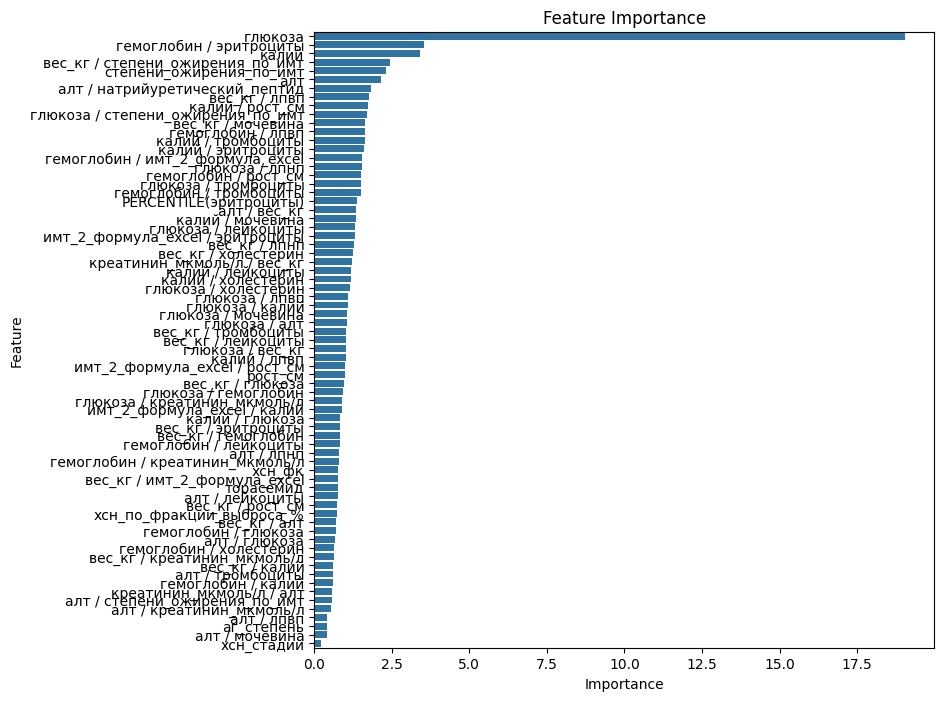

Количество признаков: 71


In [ ]:
feature_importance = optuna_search.best_estimator_.feature_importances_
feature_names = features_train_selected.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(data=feature_importance_df,
            x='Importance',
            y='Feature')
plt.title('Feature Importance')
plt.show()

num_features = len(feature_names)
print("Количество признаков:", num_features)

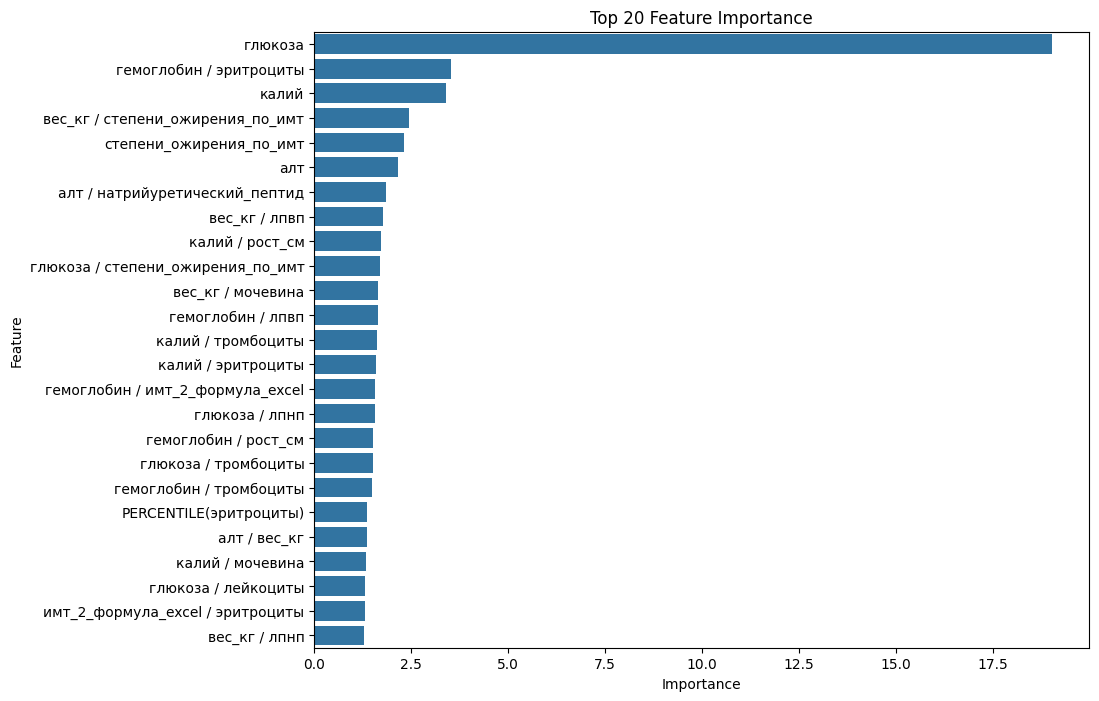

In [ ]:
top_20_features = feature_importance_df.head(25)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_features,
            x='Importance',
            y='Feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
top_20_features

,Feature,Importance
0,глюкоза,19.030100
67,гемоглобин / эритроциты,3.537077
1,калий,3.397965
14,вес_кг / степени_ожирения_по_имт,2.447267
5,степени_ожирения_по_имт,2.308059
4,алт,2.162527
34,алт / натрийуретический_пептид,1.846787
6,вес_кг / лпвп,1.781042
50,калий / рост_см,1.728986
57,глюкоза / степени_ожирения_по_имт,1.709064


In [ ]:
import lightgbm as lgb

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#features_train_selected = scaler.fit_transform(features_train_selected)
#features_test_selected = scaler.transform(features_test_selected)

param = {
    'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1, log=True),
    'n_estimators': optuna.distributions.IntDistribution(100, 1500),
    'max_depth': optuna.distributions.IntDistribution(1, 20),
    'num_leaves': optuna.distributions.IntDistribution(2, 100),
    'min_child_samples': optuna.distributions.IntDistribution(1, 20),
    'subsample': optuna.distributions.FloatDistribution(0.1, 1.0),
    'colsample_bytree': optuna.distributions.FloatDistribution(0.1, 1.0),
    'reg_alpha': optuna.distributions.FloatDistribution(0.0, 10.0),
    'reg_lambda': optuna.distributions.FloatDistribution(0.0, 10.0)
}

clf = lgb.LGBMClassifier(class_weight='balanced',
                         verbose=-1,
                         random_seed=random_state)

optuna_search = optuna.integration.OptunaSearchCV(clf,
                                                  param,
                                                  cv=5,
                                                  n_trials=50,
                                                  scoring='roc_auc',
                                                  timeout=500,
                                                  verbose=3,
                                                  n_jobs=-1,
                                                  random_state=random_state)

optuna_search.fit(features_train_selected, target_train)

train_predictions = optuna_search.predict(features_train_selected)
f1_macro_train = f1_score(target_train, train_predictions)

best_roc_auc_train = optuna_search.best_score_
best_params = optuna_search.best_params_

test_predictions = optuna_search.predict(features_test_selected)
f1_macro_test = f1_score(target_test, test_predictions)

roc_auc_test = roc_auc_score(target_test, test_predictions)

print("Best ROC AUC on train:", best_roc_auc_train)
print("F1 macro on train:", f1_macro_train)
print("Best parameters:", best_params)
print("F1 macro on test:", f1_macro_test)
print("ROC AUC on test:", roc_auc_test)

<ipython-input-207-f5a39ca7d4bc>:24: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(clf,
[I 2024-05-14 16:28:20,263] A new study created in memory with name: no-name-da8e10bf-842c-4258-8a65-f3278152616b
INFO:optuna_integration.sklearn:Searching the best hyperparameters using 305 samples...
[I 2024-05-14 16:28:20,561] Trial 0 finished with value: 0.7668279432985315 and parameters: {'learning_rate': 0.14217315808200542, 'n_estimators': 118, 'max_depth': 1, 'num_leaves': 38, 'min_child_samples': 1, 'subsample': 0.2119935858588646, 'colsample_bytree': 0.33342719622493744, 'reg_alpha': 1.335370658940045, 'reg_lambda': 4.145534318811062}. Best is trial 0 with value: 0.7668279432985315.
[I 2024-05-14 16:28:20,881] Trial 1 finished with value: 0.7555541408482584 and parameters: {'learning_rate': 0.09084681221192227, 'n_estimators': 286, 'max_depth': 3, 'num_leaves': 68, 'm

Best ROC AUC on train: 0.7892623716153129
F1 macro on train: 0.8590163934426231
Best parameters: {'learning_rate': 0.49823066297076124, 'n_estimators': 741, 'max_depth': 16, 'num_leaves': 38, 'min_child_samples': 18, 'subsample': 0.8276039325224607, 'colsample_bytree': 0.9912836160639741, 'reg_alpha': 6.798023225506183, 'reg_lambda': 3.796579218092173}
F1 macro on test: 0.7874015748031497
ROC AUC on test: 0.7954545454545455


Итоги:


В ходе работы над проектом были:

- Очищены и приведены в порядок для обучения данные, заполнены пропуски
- Заполнены пропуски
- Обработаны выбросы
- Сгенерированы и отобранные дополнительные признаки
- Были обучены две самые перспективные модели которые показали наибольший резльутат по метрикам: CatBoost и LGB.


---


**Метрики LGB**

- ROC AUC on train: 0.789
- ROC AUC on test: 0.795
- F1 macro on train: 0.859
- F1 macro on test: 0.787


---


**Метрики CatBoost:**

- ROC AUC on train: 0.774
- ROC AUC on test: 0.810
- F1 macro on train: 1.0
- F1 macro on test: 0.809


---


**Топ 5 признаков по важности CatBoost:**

- глюкоза	19.030100
- гемоглобин / эритроциты	3.537077
- калий	3.397965
- вес_кг / степени_ожирения_по_имт	2.447267
- степени_ожирения_по_имт	2.308059